In [24]:
import netCDF4 as nc
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [4]:
fgood=nc.Dataset('/results/forcing/atmospheric/GEM2.5/gemlam/gemlam_y2012m03d01.nc')

In [5]:
fbad=nc.Dataset('/results/forcing/atmospheric/GEM2.5/gemlam/gemlam_y2008m03d01.nc')

In [7]:
fgood.variables.keys()

dict_keys(['time_counter', 'nav_lon', 'nav_lat', 'qair', 'RH_2maboveground', 'therm_rad', 'u_wind', 'v_wind', 'atmpres', 'percentcloud', 'PRATE_surface', 'precip', 'solar', 'tair'])

In [8]:
fbad.variables.keys()

dict_keys(['time_counter', 'nav_lon', 'nav_lat', 'qair', 'RH_2maboveground', 'therm_rad', 'u_wind', 'v_wind', 'atmpres', 'percentcloud', 'PRATE_surface', 'precip', 'solar', 'tair'])

In [9]:
fgood.variables['nav_lon']

<class 'netCDF4._netCDF4.Variable'>
float32 nav_lon(y, x)
    _FillValue: nan
    units: degrees_east
    long_name: Longitude
    standard_name: longitude
    axis: X
    ioos_category: location
unlimited dimensions: 
current shape = (266, 256)
filling on

In [10]:
fbad.variables['nav_lon']

<class 'netCDF4._netCDF4.Variable'>
float32 nav_lon(y, x)
    _FillValue: nan
    units: degrees_east
    long_name: Longitude
    standard_name: longitude
    axis: X
    ioos_category: location
unlimited dimensions: 
current shape = (266, 256)
filling on

In [25]:
np.max(np.abs(fgood.variables['nav_lon'][:,:]-fbad.variables['nav_lon'][:,:]))

0.09422302

In [26]:
np.max(np.abs(fgood.variables['nav_lat'][:,:]-fbad.variables['nav_lat'][:,:]))

0.092746735

In [27]:
with nc.Dataset('/data/eolson/MEOPAR/NEMO-forcing-new/grid/mesh_mask201702.nc') as mesh:
    tmask=mesh.variables['tmask'][0,0,:,:]
    navlon=mesh.variables['nav_lon'][:,:]
    navlat=mesh.variables['nav_lat'][:,:]

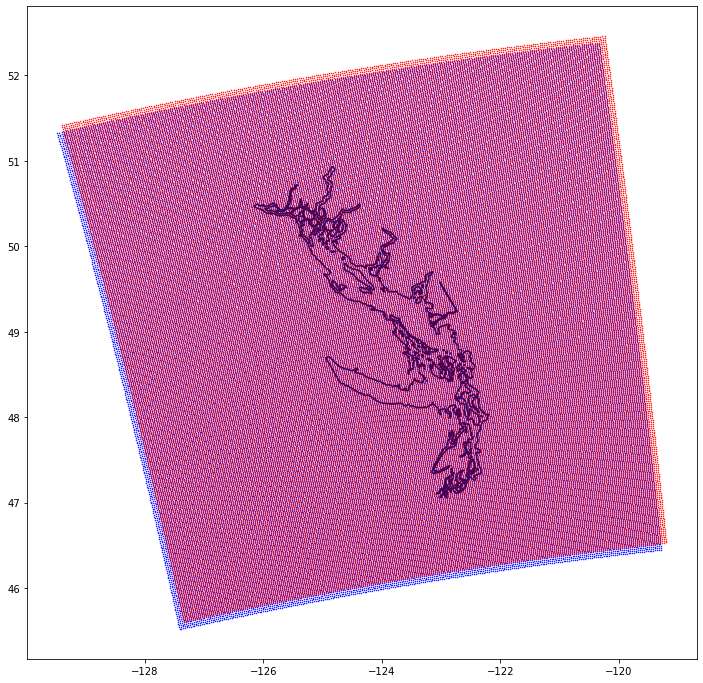

In [46]:
fig,ax=plt.subplots(1,1,figsize=(12,12))
ax.plot(fgood.variables['nav_lon'][:,:]-360,fgood.variables['nav_lat'][:,:],'b.',ms=1,zorder=1);
ax.plot(fbad.variables['nav_lon'][:,:]-360,fbad.variables['nav_lat'][:,:],'r.',ms=1,zorder=1);
ax.contour(navlon,navlat,tmask,[.5,],zorder=2,widths=(1,))
#ax.set_xlim(-126.4,-122)
#ax.set_ylim(47,51)